### Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

%matplotlib inline

### Loading the dataset

In [2]:
fname = r'C:\Users\AnitaM\Downloads\case study\train.csv'

In [3]:
data = pd.read_csv(fname)
data.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price,
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.010635,NaN
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,5.129899,NaN
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,4.976734,NaN
3,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,6.620073,NaN
4,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,4.744932,NaN


### Data at glance

In [4]:
data.dtypes

id                          int64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
log_price                 float64
              

In [5]:
data.describe()

,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,log_price,
count,4.999900e+04,49999.000000,49853.000000,49999.000000,49999.000000,49999.000000,38698.000000,49937.000000,49908.000000,49999.000000,0.0
mean,1.125866e+07,3.157563,1.235151,38.440220,-92.446264,21.000380,94.055972,1.266776,1.712431,4.781831,NaN
std,6.086302e+06,2.165059,0.582082,3.082650,21.719824,38.131564,7.870579,0.853917,1.259860,0.716910,NaN
min,3.440000e+02,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000,1.609438,NaN
25%,6.245858e+06,2.000000,1.000000,34.124873,-118.343090,1.000000,92.000000,1.000000,1.000000,4.317488,NaN
50%,1.225244e+07,2.000000,1.000000,40.662201,-76.997679,6.000000,96.000000,1.000000,1.000000,4.709530,NaN
75%,1.641108e+07,4.000000,1.000000,40.745985,-73.954598,24.000000,100.000000,1.000000,2.000000,5.220356,NaN
max,2.122836e+07,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,16.000000,7.600402,NaN


In [6]:
data.isnull().sum()

id                            0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   146
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              10711
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12338
host_since                  127
instant_bookable              0
last_review               10683
latitude                      0
longitude                     0
name                          0
neighbourhood              4617
number_of_reviews             0
review_scores_rating      11301
thumbnail_url              5595
zipcode                     640
bedrooms                     62
beds                         91
log_price                     0
                          49999
dtype: int64

In [7]:
for col in ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'host_has_profile_pic', 'host_identity_verified',
            'host_response_rate', 'instant_bookable', 'neighbourhood']:
    print('Feature : ', col, ' total number of values : ', data[col].nunique(), ' and the values : ', data[col].unique(), '\n')

Feature :  property_type  total number of values :  34  and the values :  ['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse'] 

Feature :  room_type  total number of values :  3  and the values :  ['Entire home/apt' 'Private room' 'Shared room'] 

Feature :  bed_type  total number of values :  5  and the values :  ['Real Bed' 'Futon' 'Pull-out Sofa' 'Couch' 'Airbed'] 

Feature :  cancellation_policy  total number of values :  5  and the values :  ['strict' 'moderate' 'flexible' 'super_strict_30' 'super_strict_60'] 

Feature :  host_has_profile_pic  total number of values :  2  and the values :  ['t' nan 'f'] 

Feature :  host_identity_verified  total number of 

### Data Cleaning

In [8]:
# Filling median value im missing value for bathroom column:
data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)

In [9]:
# Extracting empty host_since data:
data_host_since_empty = data[data['host_since'].isnull()]
print('Shape of extracted data : ', data_host_since_empty.shape)
print('Checking null values in the extracted data : ', data_host_since_empty.isnull().sum())

Shape of extracted data :  (127, 30)
Checking null values in the extracted data :  id                          0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                   0
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                 0
first_review               22
host_has_profile_pic      127
host_identity_verified    127
host_response_rate        127
host_since                127
instant_bookable            0
last_review                19
latitude                    0
longitude                   0
name                        0
neighbourhood               2
number_of_reviews           0
review_scores_rating       25
thumbnail_url              14
zipcode                     1
bedrooms                    0
beds                        0
log_price                   0
                          127
dtype: int64


In [10]:
# These data have no host information.

In [11]:
# Filling missing value in firt_review column with 'No first review'
data['first_review'].fillna('No first review', inplace=True)

In [12]:
data['host_has_profile_pic'].value_counts()

t    49722
f      150
Name: host_has_profile_pic, dtype: int64

In [13]:
# Filling missing value in host_has_profile_pic with 'f'
data['host_has_profile_pic'].fillna('f', inplace=True)

In [14]:
data['host_identity_verified'].value_counts()

t    33545
f    16327
Name: host_identity_verified, dtype: int64

In [15]:
# Filling missing value in host_identity_verified with 'f'
data['host_identity_verified'].fillna('f', inplace=True)

In [16]:
# Checking the data in host_response_rate as it in object type
data['host_response_rate'].head()

0     NaN
1    100%
2    100%
3     NaN
4    100%
Name: host_response_rate, dtype: object

In [17]:
# Removing % and converting it to integer 
data['host_response_rate']=data['host_response_rate'].astype("str")
data['host_response_rate']=[x.replace('%','') for x in data['host_response_rate']]
data['host_response_rate']=pd.to_numeric(data['host_response_rate'],errors="coerce")

In [18]:
data['host_response_rate'].value_counts()

100.0    29124
90.0      1563
80.0       752
0.0        597
50.0       406
         ...  
39.0         1
23.0         1
13.0         1
15.0         1
6.0          1
Name: host_response_rate, Length: 77, dtype: int64

In [19]:
data['host_response_rate'].isnull().sum()

12338

In [20]:
data['host_response_rate'].median()

100.0

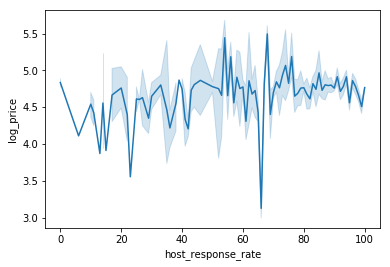

In [21]:
# Checking the relation among host_response_rate and log_price
sns.lineplot(x='host_response_rate', y='log_price', data=data)

There is no relation as such between host_response_rate and log_price of listings and so droping host_response_rate column

In [22]:
# Filling missing values in host_since with 1/1/2008 (given data starts for 2008 year)
data['host_since'].fillna('1/1/2008', inplace=True)

data['host_since'] = pd.to_datetime(data['host_since'], infer_datetime_format=True)
data['host_since_year'] = pd.DatetimeIndex(data['host_since']).year
data['host_since_month'] = pd.DatetimeIndex(data['host_since']).month
data['host_since_weekday'] = pd.DatetimeIndex(data['host_since']).weekday

In [23]:
# Filling missing value in last_review column with 'No last review'
data['last_review'].fillna('No last review', inplace=True)

Shape of the data with no neighbourhood  (4617, 33)


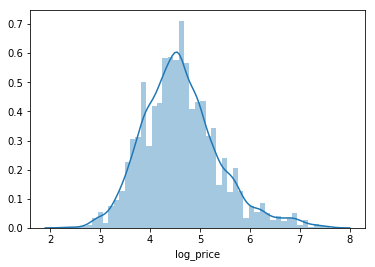

In [24]:
# Genrally, the neighbourhood affects the listing price. 
# Checking the distribution of log_price for listing with no neighbourhood mentioned
data_no_neighbourhood = data[data['neighbourhood'].isnull()]
print('Shape of the data with no neighbourhood ', data_no_neighbourhood.shape)
sns.distplot(data_no_neighbourhood['log_price'])

In [25]:
# These log_prices follow normal distribution too.

In [26]:
# Fill the missing values in neighbourhood column with 'No neighbourhood mentioned'
data['neighbourhood'].fillna('No neighbourhood mentioned', inplace=True)

In [27]:
# Fill 0 as review score rating where there is no first and last review else median of the column
median = data['review_scores_rating'].median()
for i in range(len(data)):
    if pd.isnull(data['review_scores_rating'][i]):
        if data['first_review'][i] == 'No first review' and data['last_review'][i] == 'No last review':
            data.loc[i, 'review_scores_rating'] = 0
        else:
            data.loc[i, 'review_scores_rating'] = median

In [28]:
# Fill median in missing value for bedrooms
data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)

In [29]:
# Fill median in missing value for beds
data['beds'].fillna(data['beds'].median(), inplace=True)

In [30]:
# Check if any null value are still present
data.isnull().sum()

id                            0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review                  0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        12338
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating          0
thumbnail_url              5595
zipcode                     640
bedrooms                      0
beds                          0
log_price                     0
                          49999
host_since_year               0
host_sin

In [31]:
# Drop columns : id, description, host_response_rate, thumbnail_url, zipcode
data.drop(['id', 'description', 'host_response_rate', 'thumbnail_url', 'zipcode'], 1, inplace=True)

In [32]:
del data[data.columns[-1]]

In [33]:
data.isnull().sum()

property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review                  0
host_has_profile_pic          0
host_identity_verified        0
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating          0
bedrooms                      0
beds                          0
log_price                     0
                          49999
host_since_year               0
host_since_month              0
dtype: int64

### Exploratory data analysis

In [34]:
data['property_type'].value_counts()

Apartment             33113
House                 11138
Condominium            1759
Townhouse              1146
Loft                    834
Other                   392
Guesthouse              324
Bed & Breakfast         320
Bungalow                264
Villa                   120
Dorm                     99
Guest suite              83
Camper/RV                63
Cabin                    49
In-law                   49
Hostel                   48
Timeshare                46
Boutique hotel           44
Boat                     36
Serviced apartment       16
Tent                     12
Castle                    8
Yurt                      7
Vacation home             7
Treehouse                 6
Hut                       5
Chalet                    3
Earth House               2
Parking Space             1
Casa particular           1
Tipi                      1
Lighthouse                1
Train                     1
Cave                      1
Name: property_type, dtype: int64

In [35]:
# Calculating avg price per property
pivot_property_type = data.pivot_table(index='property_type', values='log_price', aggfunc=np.mean)

# Reseting index for pivot dataframe
pivot_property_type.reset_index(inplace=True)
pivot_property_type.head()

,property_type,log_price
0,Apartment,4.756882
1,Bed & Breakfast,4.565315
2,Boat,5.311239
3,Boutique hotel,5.066054
4,Bungalow,4.770030


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

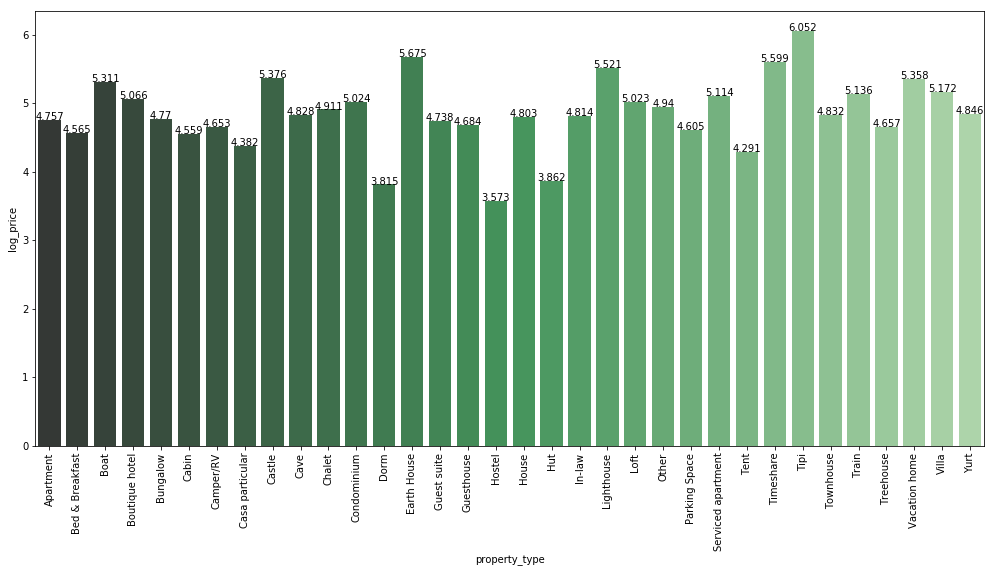

In [36]:
# Ploting avg price per property
plt.figure(figsize=[17,8])
g = sns.barplot(x='property_type', y='log_price', data=pivot_property_type, palette='Greens_d')

for index, row in pivot_property_type.iterrows():
    g.text(row.name,row.log_price, round(row.log_price,3), color='black', ha='center')

plt.xticks(rotation=90)

##### Timeshare property_type seems to be expensive while hostel seems to be the cheapest property

In [37]:
data['room_type'].value_counts()

Entire home/apt    27905
Private room       20658
Shared room         1436
Name: room_type, dtype: int64

In [38]:
# Calculating avg price per room_type
pivot_room_type = data.pivot_table(index='room_type', values='log_price', aggfunc=np.mean)

# Reseting index for pivot dataframe
pivot_room_type.reset_index(inplace=True)
pivot_room_type.head()

,room_type,log_price
0,Entire home/apt,5.168301
1,Private room,4.324253
2,Shared room,3.854384


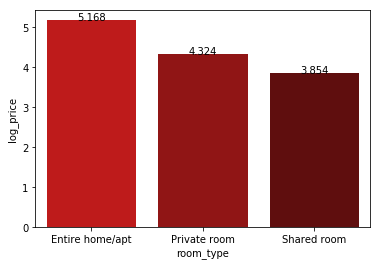

In [39]:
# Ploting avg price per room type
g = sns.barplot(x='room_type', y='log_price', data=pivot_room_type, palette='flag')
for index, row in pivot_room_type.iterrows():
    g.text(row.name,row.log_price, round(row.log_price,3), color='black', ha='center')

##### Entire home/apt type have more price than shared room

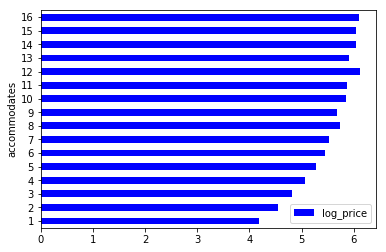

In [40]:
# Calculating price per accommodates value
pivot_accommodates = data.pivot_table(index='accommodates', values='log_price', aggfunc=np.mean)
pivot_accommodates.plot(kind='barh', color='blue')

##### More accommodation more price 

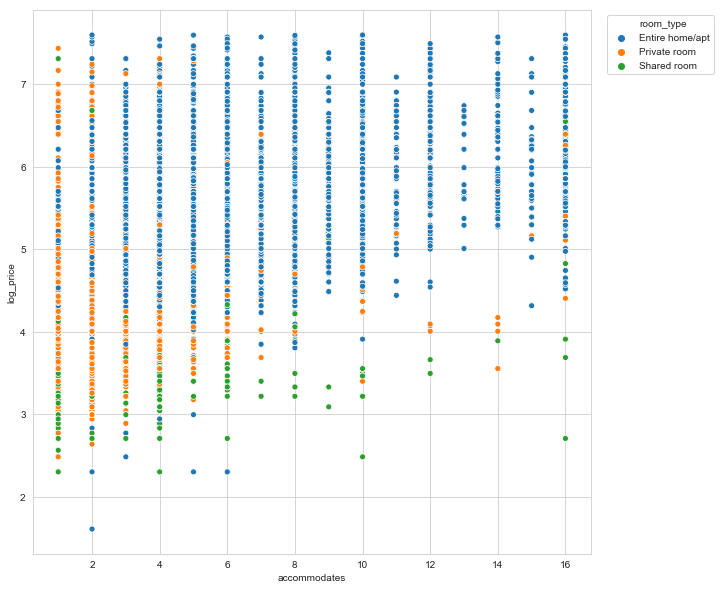

In [41]:
plt.figure(figsize=[10,10])
sns.set_style(style='whitegrid')
sns.scatterplot(x='accommodates', y='log_price',
                hue='room_type', data=data)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

##### Lower price has more listings for private or shared room type while as the price goes up, the listing for Entire home/apt type increases

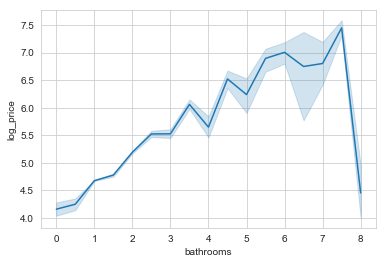

In [42]:
sns.lineplot(x='bathrooms', y='log_price', data=data)

##### As the number of bathrooms increase for the property listing the price goes up and comes down drastically for very high number of bathrooms

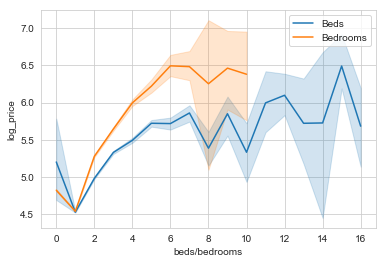

In [43]:
sns.lineplot(x='beds', y='log_price', data=data)
sns.lineplot(x='bedrooms', y='log_price', data=data)
plt.xlabel('beds/bedrooms')
plt.legend(labels=['Beds','Bedrooms'])

##### Price goes up with increase in number of beds or bedrooms but fluctuates beyond this

In [44]:
data['property_type'].value_counts()

Apartment             33113
House                 11138
Condominium            1759
Townhouse              1146
Loft                    834
Other                   392
Guesthouse              324
Bed & Breakfast         320
Bungalow                264
Villa                   120
Dorm                     99
Guest suite              83
Camper/RV                63
Cabin                    49
In-law                   49
Hostel                   48
Timeshare                46
Boutique hotel           44
Boat                     36
Serviced apartment       16
Tent                     12
Castle                    8
Yurt                      7
Vacation home             7
Treehouse                 6
Hut                       5
Chalet                    3
Earth House               2
Parking Space             1
Casa particular           1
Tipi                      1
Lighthouse                1
Train                     1
Cave                      1
Name: property_type, dtype: int64

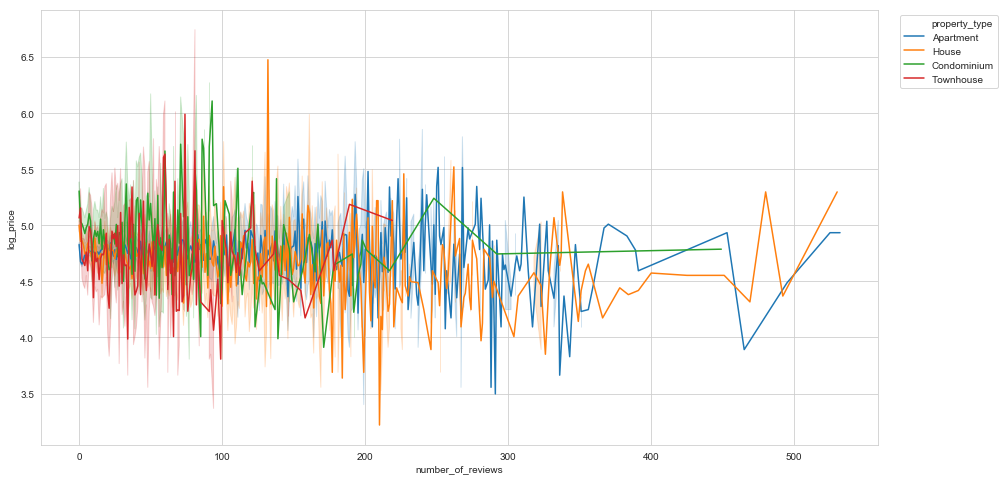

In [45]:
options = ['Apartment', 'House', 'Condominium', 'Townhouse']

# Extracting data for those property type that have more than 1000 listings
data_sub = data[data['property_type'].isin(options)]

plt.figure(figsize=[15,8])
sns.lineplot(x='number_of_reviews', y='log_price', data=data_sub, hue='property_type')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

##### The number of reviews are more for Apartment and house; the most lsited property_type and the review counts don't have incresing or decreasing relation with price of the property. 

In [46]:
data['neighbourhood'].value_counts()

No neighbourhood mentioned    4617
Williamsburg                  1909
Bedford-Stuyvesant            1462
Bushwick                      1081
Upper West Side                966
                              ... 
Barry Farm                       1
Paramount                        1
Arleta                           1
Spring Valley                    1
Clifton                          1
Name: neighbourhood, Length: 599, dtype: int64

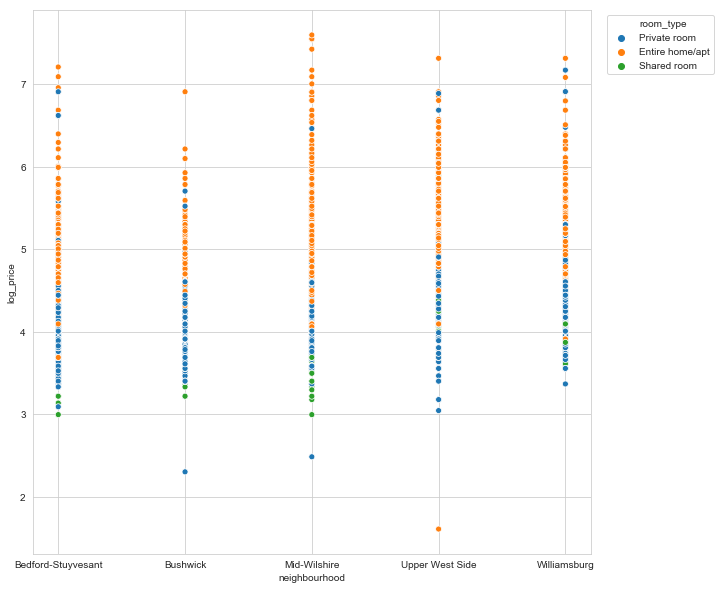

In [47]:
options = ['Williamsburg', 'Bedford-Stuyvesant', 'Bushwick', 'Upper West Side', 'Mid-Wilshire']

# Extracting data for top 5 neighbourhood as listing count  
data_sub = data[data['neighbourhood'].isin(options)]

plt.figure(figsize=[10,10])
sns.scatterplot(x='neighbourhood', y='log_price',
                hue='room_type', data=data_sub)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

##### In the top listed neighbours, maximum listings are for entire apt/room or private room with higher price for entire apt/room as compared to private room 

In [48]:
pivot_neighbourhood = data.pivot_table(index='neighbourhood', values='log_price', aggfunc=np.mean)
neighbourhood_count = data['neighbourhood'].value_counts().rename_axis('neighbourhood').reset_index(name='counts')

In [49]:
pivot_neighbourhood.reset_index(inplace=True)

In [50]:
pivot_neighbourhood['neighbourhood_count'] = 0

In [51]:
for i in range(len(pivot_neighbourhood)):
    for j in range(len(neighbourhood_count)):
        if pivot_neighbourhood['neighbourhood'][i] == neighbourhood_count['neighbourhood'][j]:
            pivot_neighbourhood.loc[i, 'neighbourhood_count'] = neighbourhood_count.loc[j, 'counts']

pivot_neighbourhood.head()

,neighbourhood,log_price,neighbourhood_count
0,16th Street Heights,4.650227,65
1,Adams Morgan,4.927710,133
2,Alamo Square,5.121299,53
3,Albany Park,4.278973,14
4,Alhambra,4.138619,46


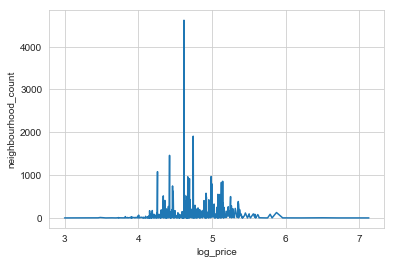

In [52]:
sns.lineplot(x='log_price', y='neighbourhood_count', data=pivot_neighbourhood)

##### There seems to be no increasing or decreasing relation among the listings in each neighbourhood and the mean log_price for that neighbourhood

In [53]:
import folium

In [54]:
pivot_city = data.pivot_table(index='city', values='log_price', aggfunc=np.mean)

In [55]:
pivot_city.reset_index(inplace=True)

In [56]:
# Adding latitude and longitude information for each city for geospatial analysis
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='geo_app')

pivot_city['latitude'] = 0
pivot_city['longitude'] = 0

In [57]:
for i in range(len(pivot_city)):
    if pivot_city['city'][i] == 'LA':
        city = geolocator.geocode('Los Angeles', timeout=20)
        pivot_city.loc[i, 'latitude'] = city.latitude
        pivot_city.loc[i, 'longitude'] = city.longitude
    else:
        city = geolocator.geocode(pivot_city['city'][i], timeout=20)
        pivot_city.loc[i, 'latitude'] = city.latitude
        pivot_city.loc[i, 'longitude'] = city.longitude

pivot_city

,city,log_price,latitude,longitude
0,Boston,4.890708,42.360253,-71.058291
1,Chicago,4.607209,41.875562,-87.624421
2,DC,4.999549,4.653333,-74.083652
3,LA,4.723895,34.053691,-118.242766
4,NYC,4.715586,40.712728,-74.006015
5,SF,5.166736,37.779026,-122.419906


In [58]:
# Using folium map - Marker to plot the data

In [62]:
# create base US map
city_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

In [63]:
for i in range (6):
    city=pivot_city['city'][i]
    lat=pivot_city['latitude'][i]
    long=pivot_city['longitude'][i]
    price=pivot_city['log_price'][i]
    folium.Marker( [lat, long], 
                   popup='City: {} <br> log_price: {}'.format(city, price), 
                   tooltip=city,
                   icon=folium.Icon(color="green", icon="info-sign")).add_to(city_map)
city_map

In [64]:
# Uisng pivot_neighbourhood to select the top 50 neighbourhood as per log_price
pivot_neighbourhood.sort_values(by=['log_price'], ascending=False, inplace=True)
pivot_neighbourhood.reset_index(inplace=True)

pivot_neighbourhood_top = pivot_neighbourhood.head(50)

In [77]:
# Using the top 50 neighbourhood and their log price to plot on map
# create base US map
neighbourhood_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

In [66]:
pivot_neighbourhood_top['latitude'] = 0
pivot_neighbourhood_top['longitude'] = 0

In [67]:
pivot_neighbourhood_top.head()

,index,neighbourhood,log_price,neighbourhood_count,latitude,longitude
0,103,"Chevy Chase, MD",7.130899,1,0,0
1,398,Observatory Circle,6.715383,1,0,0
2,465,Sea Cliff,6.506483,4,0,0
3,344,Mill Basin,6.214608,1,0,0
4,183,Emerson Hill,6.138033,2,0,0


In [68]:
for i in range(len(pivot_neighbourhood_top)):
    neighbourhood = geolocator.geocode(pivot_neighbourhood_top['neighbourhood'][i], timeout=20)
    
    pivot_neighbourhood_top.loc[i, 'latitude'] = (neighbourhood.latitude)
    pivot_neighbourhood_top.loc[i, 'longitude'] = (neighbourhood.longitude)

In [69]:
pivot_neighbourhood_top.head()

,index,neighbourhood,log_price,neighbourhood_count,latitude,longitude
0,103,"Chevy Chase, MD",7.130899,1,38.982247,-77.088187
1,398,Observatory Circle,6.715383,1,39.132219,-84.410823
2,465,Sea Cliff,6.506483,4,40.849156,-73.644843
3,344,Mill Basin,6.214608,1,40.603249,-73.906875
4,183,Emerson Hill,6.138033,2,42.045930,-71.827293


In [78]:
for i in range(len(pivot_neighbourhood_top)):
    neighbourhood = pivot_neighbourhood_top['neighbourhood'][i]
    lat = pivot_neighbourhood_top['latitude'][i]
    long = pivot_neighbourhood_top['longitude'][i]
    price = pivot_neighbourhood_top['log_price'][i]
    folium.CircleMarker(
#        location=[pivot_neighbourhood_top['latitude'][i], pivot_neighbourhood_top['longitude'][i]],
        location=[lat, long],
        radius=2 * price,
        popup='Neighbourhood: {} <br> log_price: {}'.format(neighbourhood, price),
        color='#3186cc',
        fill=True,
        fill_color='#3186cc',
    ).add_to(neighbourhood_map)

neighbourhood_map